## Evaluation metrics

### Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## Model Evalution

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

    
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [3]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values


del df_train['churn']
del df_val['churn']
del df_test['churn']

In [4]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']


categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [5]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient= 'records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
val_dict = df_val[categorical + numerical].to_dict(orient= 'records')
X_val = dv.fit_transform(val_dict)

y_pred = model.predict_proba(X_val)[:,1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

### Accuracy and dummy model

In [7]:
len(y_val)

1409

In [8]:
(y_val == churn_decision).mean()

0.8034066713981547

In [9]:
(y_val == churn_decision).sum()

1132

In [10]:
1132/1409

0.8034066713981547

In [11]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t,score))
    scores.append(score)
    

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [12]:
 scores

[0.2739531582682754,
 0.5088715400993612,
 0.5911994322214337,
 0.6664300922640171,
 0.7097232079489,
 0.7388218594748048,
 0.7601135557132718,
 0.7721788502484032,
 0.7849538679914834,
 0.7934705464868701,
 0.8034066713981547,
 0.801277501774308,
 0.794889992902768,
 0.7863733144073811,
 0.765791341376863,
 0.7444996451383961,
 0.7345635202271115,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246]

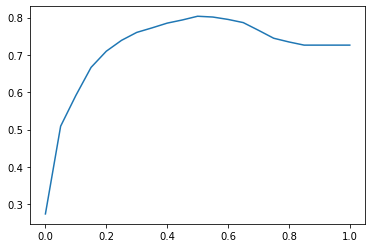

In [13]:
plt.plot(thresholds, scores)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_val, y_pred >= 0.5 )

0.8034066713981547

In [16]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t,score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [17]:
from collections import Counter

In [18]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [19]:
1 - y_val.mean()

0.7260468417317246

### Confusion table

In [20]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [21]:
Counter(actual_negative)

Counter({True: 1023, False: 386})

In [22]:
Counter(actual_positive)

Counter({False: 1023, True: 386})

In [23]:
t = 0.5 
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [24]:
tp = (predict_positive &  actual_positive).sum()
tn = (predict_negative &  actual_negative).sum()

In [25]:
tn

922

In [26]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [27]:
fp

101

In [28]:
fn

176

In [29]:
confusion_matix = np.array([
    [tn , fp],
    [fn , tp]


])
confusion_matix

array([[922, 101],
       [176, 210]])

In [30]:
(confusion_matix / confusion_matix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

### Precision and recall

In [31]:
n = (tp + tn + fp + fn)

(tp + tn ) / n

0.8034066713981547

In [32]:
p = tp / (tp + fp)
p 

0.6752411575562701

In [33]:
tp

210

In [34]:
r = tp / (tp + fn )
r

0.5440414507772021

### ROC Curves

In [35]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [36]:
fpr = fp/(fp + tn)
fpr

0.09872922776148582

In [37]:
r

0.5440414507772021

In [38]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive &  actual_positive).sum()
    tn = (predict_negative &  actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    
    scores.append((t, tp, fp, fn, tn))
    
    

In [39]:
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 913, 1, 110),
 (0.02, 384, 830, 2, 193),
 (0.03, 383, 766, 3, 257),
 (0.04, 381, 715, 5, 308),
 (0.05, 379, 685, 7, 338),
 (0.06, 377, 661, 9, 362),
 (0.07, 372, 641, 14, 382),
 (0.08, 371, 613, 15, 410),
 (0.09, 369, 580, 17, 443),
 (0.1, 366, 556, 20, 467),
 (0.11, 365, 528, 21, 495),
 (0.12, 365, 509, 21, 514),
 (0.13, 360, 477, 26, 546),
 (0.14, 355, 453, 31, 570),
 (0.15, 351, 435, 35, 588),
 (0.16, 347, 419, 39, 604),
 (0.17, 346, 401, 40, 622),
 (0.18, 344, 384, 42, 639),
 (0.19, 338, 369, 48, 654),
 (0.2, 333, 356, 53, 667),
 (0.21, 330, 341, 56, 682),
 (0.22, 323, 322, 63, 701),
 (0.23, 320, 313, 66, 710),
 (0.24, 316, 304, 70, 719),
 (0.25, 309, 291, 77, 732),
 (0.26, 304, 281, 82, 742),
 (0.27, 303, 270, 83, 753),
 (0.28, 295, 256, 91, 767),
 (0.29, 291, 244, 95, 779),
 (0.3, 284, 236, 102, 787),
 (0.31, 280, 230, 106, 793),
 (0.32, 278, 226, 108, 797),
 (0.33, 276, 221, 110, 802),
 (0.34, 274, 212, 112, 811),
 (0.35000000000000003, 272,

In [40]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [41]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

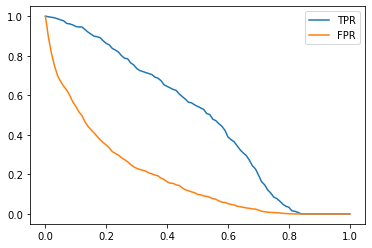

In [42]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')
plt.legend()
plt.show()
         

### Random Model

In [43]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))


In [44]:
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02])

In [45]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [46]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)


        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive &  actual_positive).sum()
        tn = (predict_negative &  actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()


        scores.append((t, tp, fp, fn, tn))
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [47]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [48]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


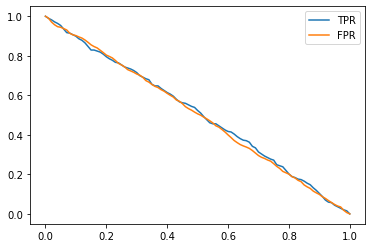

In [49]:
plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')
plt.legend()
plt.show()

### Ideal Model

In [50]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [51]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [52]:
y_ideal.sum()

386

In [53]:
y_ideal_pred = np.linspace(0,1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [54]:
1 - y_val.mean()

0.7260468417317246

In [55]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [56]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [57]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


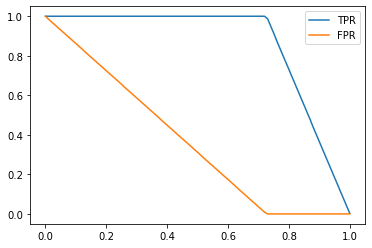

In [58]:
plt.plot(df_rand.threshold, df_ideal['tpr'], label = 'TPR')
plt.plot(df_rand.threshold, df_ideal['fpr'], label = 'FPR')
plt.legend()


### Putting the models together

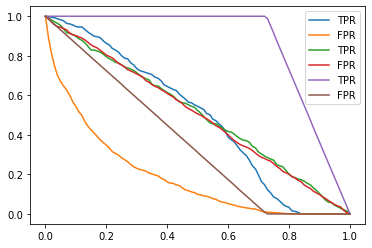

In [59]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')

plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')


plt.plot(df_rand.threshold, df_ideal['tpr'], label = 'TPR')
plt.plot(df_rand.threshold, df_ideal['fpr'], label = 'FPR')





plt.legend()

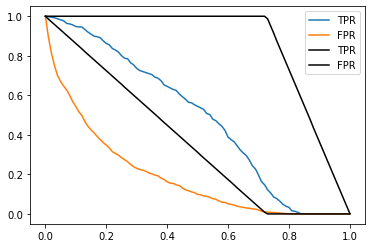

In [60]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')



plt.plot(df_rand.threshold, df_ideal['tpr'], label = 'TPR', color='black')
plt.plot(df_rand.threshold, df_ideal['fpr'], label = 'FPR', color='black')





plt.legend()

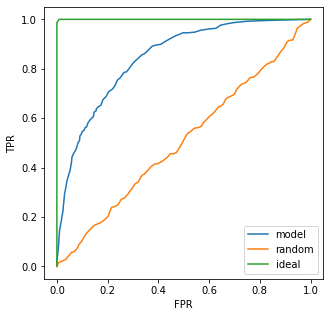

In [61]:
plt.figure(figsize= (5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label = 'model')
plt.plot(df_rand.fpr, df_rand.tpr, label = 'random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')


plt.legend()

In [62]:
from sklearn.metrics import roc_curve

In [63]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

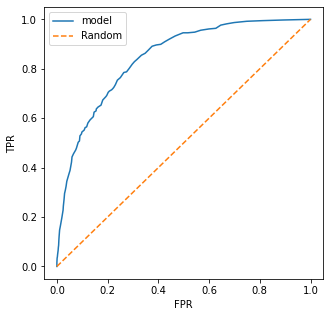

In [64]:
plt.figure(figsize= (5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label = 'model')
plt.plot([0,1], [0,1], label = 'Random', linestyle='--')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')


plt.legend()

### ROC AUC

In [65]:
from sklearn.metrics import auc

In [66]:
auc(fpr, tpr)

0.8438530381535563

In [67]:
auc(df_scores.fpr, df_scores.tpr)


0.8438732975754537

In [68]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [69]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(df_scores.fpr, df_scores.tpr)

0.8438732975754537

In [70]:
from sklearn.metrics import roc_auc_score

In [71]:
roc_auc_score(y_val, y_pred)

0.8438530381535563

In [72]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [73]:
import random

In [74]:
n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.84441

In [75]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n )
neg_ind = np.random.randint(0, len(neg), size=n )

(pos[pos_ind] > neg[neg_ind]).mean()

0.84646

### Cross-Validtion

In [76]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [77]:
dv, model = train(df_train, y_train)

In [78]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [79]:
y_pred = predict(df_val, dv, model)

In [80]:
from sklearn.model_selection import KFold

In [81]:
kfold = KFold(n_splits =10, shuffle=True, random_state=1)

In [82]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [83]:
len(train_idx), len(val_idx)

(5070, 564)

In [84]:
len(df_full_train)

5634

In [85]:
from tqdm.auto import tqdm

In [87]:
scores = []



for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    
    

In [88]:
scores

[0.8479398247539081,
 0.8413056930693068,
 0.8557214756739697,
 0.8331413052423668,
 0.8244571960297766,
 0.8342657342657342,
 0.8412732009117552,
 0.8186669829222013,
 0.8452200978212538,
 0.8617693522906793]

In [89]:
print (np.mean(scores),np.std(scores))

0.8403760862980952 0.012609008965870147


In [91]:
print ('%.3f +- %.3f' % (np.mean(scores),np.std(scores)))

0.840 +- 0.013


In [97]:
n_splits = 5 


for C in [0.001, 0.01, 0.5, 1,5, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)


        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print ('C=%s %.3f +- %.3f' % (C,np.mean(scores),np.std(scores)))
        
    

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.5 0.840 +- 0.007
C=1 0.841 +- 0.008
C=5 0.841 +- 0.008
C=10 0.841 +- 0.008


In [99]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)


auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259